In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

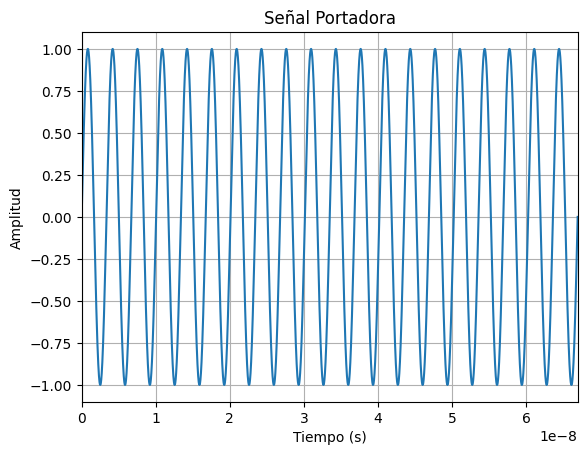

In [7]:


c = 2.988e8             #Velocidad de la luz
Dmin = 2                #Distancia minima que detecta el radar
Dmax = 10               #Distancia maxima que detecta el radar


PRI = (Dmax*2)/c        #Frecuenca de transmision de pulsos del radar [s]
PRF = 1/PRI             #Periodo de transmision de pulsos de radar    [s]
duracion = PRI * 10
Muestras = 100000
A = 1

t = np.linspace(0, duracion, Muestras, endpoint=False)

# Crear la señal sinusoidal
senal_sin_ruido = A * np.sin(2 * np.pi * PRF * 20 * t)

# Graficar la señal
plt.plot(t, senal_sin_ruido)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Portadora')
plt.xlim(0, PRI)
plt.grid(True)
plt.show()


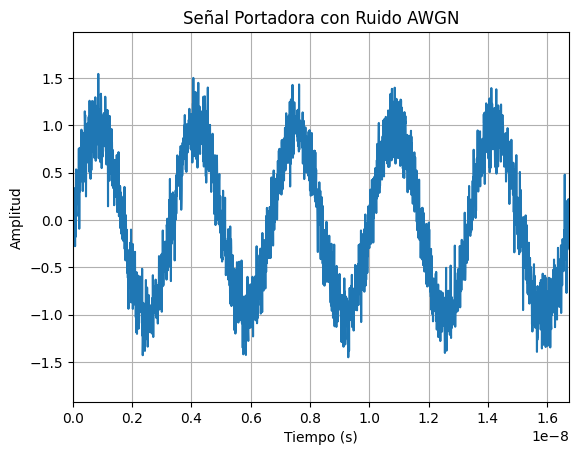

In [16]:
# Generar ruido gaussiano
AWGN = np.random.normal(loc=0, scale=0.2, size=len(t))

# Señal con ruido
Rx = senal_sin_ruido + AWGN

# Graficar la señal
plt.plot(t, Rx)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Portadora con Ruido AWGN')
plt.xlim(0, PRI/4)
plt.grid(True)
plt.show()

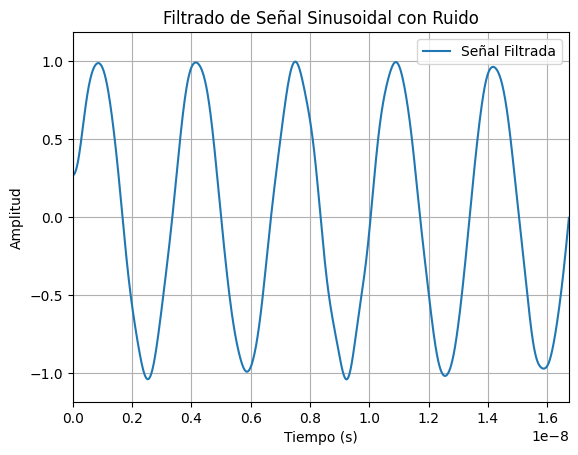

In [17]:
# Filtrar la señal con un filtro pasa bajos
fc = 1000  # Frecuencia de corte del filtro pasa bajos en Hz
b, a = signal.butter(4, fc/(Muestras/2), 'low')  # Diseñar el filtro
senal_filtrada = signal.filtfilt(b, a, Rx)

plt.plot(t, senal_filtrada, label='Señal Filtrada')
plt.xlabel('Tiempo (s)')
plt.xlim(0, PRI/4)
plt.ylabel('Amplitud')
plt.title('Filtrado de Señal Sinusoidal con Ruido')
plt.legend()
plt.grid(True)
plt.show()